<a href="https://colab.research.google.com/github/DmitryKutsev/DeepHW/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

from sklearn.metrics import classification_report

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import accuracy_score

import time

In [23]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [24]:
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

In [25]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()
#what is .long()?

In [26]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

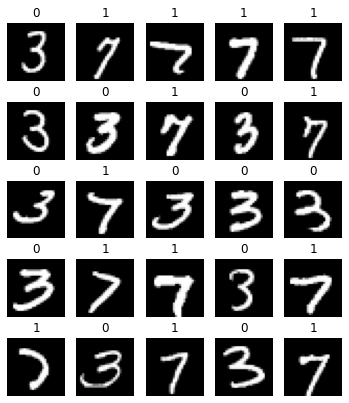

In [27]:
X, y = next(iter(train_loader))
X = X.numpy()
y = y.numpy()

plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

In [28]:
for x, y in train_loader:
    break

In [29]:
x.shape

torch.Size([128, 1, 28, 28])

In [30]:
x.view(x.shape[0], -1).numpy().shape

(128, 784)

In [31]:

for x, y in train_loader:
    x = x.view(x.shape[0], -1).numpy()
    y = y.numpy()
    break

In [32]:

# количество эпох - полных проходов по датасету
epochs = 3

for n_epoch in range(epochs):
    
    dataset_passed_samples = 0
    
    for x, y in train_loader:
        
        # вот здесь мы могли бы как-то манипулировать с данными
        # например, учить, но пока этого делать не будет
        # только демонстрация
        
        time.sleep(0.05)
        
        dataset_passed_samples += x.shape[0]
        
        dataset_passed_percent = dataset_passed_samples * 100 / train_loader.dataset.data.shape[0]
        
        print(f'Эпоха - {n_epoch + 1}, прошли - {dataset_passed_percent:.2f} % датасета', end='\r')
        
    print('\r')

Эпоха - 1, прошли - 100.00 % датасета
Эпоха - 2, прошли - 100.00 % датасета
Эпоха - 3, прошли - 100.00 % датасета


In [33]:
# таким образом мы создаем матрицу 64 на 512 с рандомными значениями
x = np.random.rand(64, 512)
x

array([[0.05217524, 0.25954986, 0.83557058, ..., 0.46813338, 0.55730836,
        0.21364033],
       [0.67409732, 0.01761064, 0.2169318 , ..., 0.49285406, 0.98597288,
        0.25965318],
       [0.84325309, 0.82143682, 0.12432642, ..., 0.4852716 , 0.97749531,
        0.38264071],
       ...,
       [0.13237533, 0.75184178, 0.83825827, ..., 0.96897054, 0.48510381,
        0.27512365],
       [0.74989253, 0.9076268 , 0.92426446, ..., 0.49294825, 0.09480629,
        0.30811876],
       [0.77248148, 0.86409352, 0.33918554, ..., 0.85342026, 0.40405662,
        0.75163254]])

In [34]:
# большинство функций применяются к каждому элементу массива
# здесь мы каждый элемент массива возвели в квадрат и прибавили к получившемуся значению логарифм элемента матрицы 
x ** 2 + np.log(x)

array([[-2.95042503, -1.28144033,  0.51853773, ..., -0.53985317,
        -0.27404399, -1.49781921],
       [ 0.06002642, -4.03894174, -1.48111284, ..., -0.46463706,
         0.95801609, -1.28098869],
       [ 0.54058763,  0.4780582 , -2.0693877 , ..., -0.48755801,
         0.9327353 , -0.81424493],
       ...,
       [-2.00459079,  0.28003668,  0.52624791, ...,  0.90738284,
        -0.48806666, -1.21484163],
       [ 0.27451343,  0.7268644 ,  0.77550776, ..., -0.46435309,
        -2.3469313 , -1.08233283],
       [ 0.33858041,  0.60058333, -0.96616118, ...,  0.56982298,
        -0.74293851,  0.27944377]])

In [35]:
y = np.random.rand(512, 1024)
# скалярное произведение
res = np.dot(x, y)

In [36]:
res.shape == (x.shape[0], y.shape[1])

True

In [37]:
x.shape

(64, 512)

In [38]:
res.shape

(64, 1024)